In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 99% 658M/663M [00:03<00:00, 188MB/s]
100% 663M/663M [00:03<00:00, 175MB/s]


In [6]:
!unzip tuberculosis-tb-chest-xray-dataset.zip 

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [7]:
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import time
from tqdm import tqdm
from sklearn.metrics import f1_score
from IPython.display import YouTubeVideo
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
print ('Modules loaded')

Modules loaded


In [8]:
pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


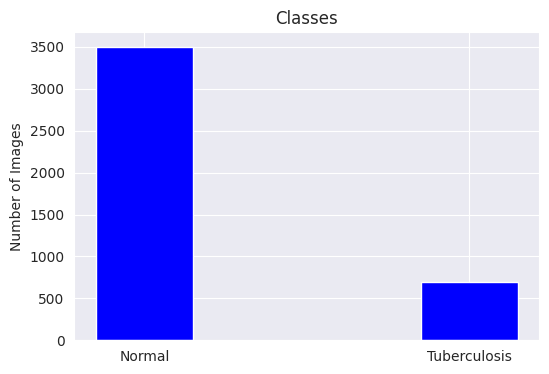

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Normal':3500, 'Tuberculosis':700
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 4))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.3)
 
plt.ylabel("Number of Images")
plt.title("Classes")
plt.show()

In [10]:
import Augmentor

# Set the path to the input directory containing the original images
input_dir = "/content/TB_Chest_Radiography_Database/Tuberculosis"

# Set the path to the output directory where the generated images will be saved
output_dir = "/content/sample_data/output"

# Create a pipeline object
pipeline = Augmentor.Pipeline(input_dir)

# Apply image augmentations
pipeline.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
pipeline.flip_left_right(probability=0.5)
pipeline.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)

# Generate new images and save them to the output directory
num_samples = 2800
pipeline.sample(num_samples, '/content/sample_data/output')


Initialised with 700 image(s) found.
Output directory set to /content/TB_Chest_Radiography_Database/Tuberculosis/output.

Processing <PIL.Image.Image image mode=L size=512x512 at 0x7FA15DBBB220>: 100%|██████████| 2800/2800 [03:36<00:00, 12.95 Samples/s]


In [11]:
import os
import shutil

# Set the path to the input directory containing the images
input_directory = "/content/TB_Chest_Radiography_Database/Tuberculosis/output"

# Set the path to the output directory where you want to copy the images
output_directory = "/content/TB_Chest_Radiography_Database/Tuberculosis"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Get the list of files in the input directory
files = os.listdir(input_directory)

# Loop over the files and copy them to the output directory
for file in files:
    if file.endswith(".jpg") or file.endswith(".png"):
        input_path = os.path.join(input_directory, file)
        output_path = os.path.join(output_directory, file)
        shutil.copyfile(input_path, output_path)

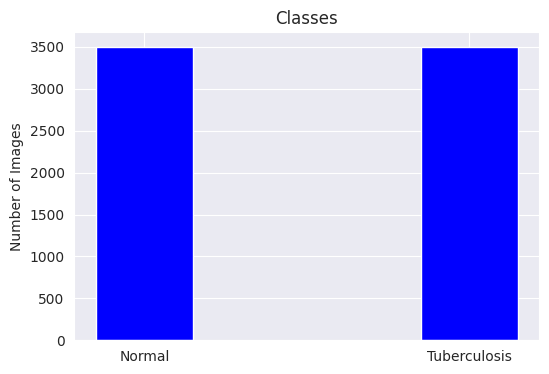

In [12]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Normal':3500, 'Tuberculosis':3500
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 4))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.3)
 
plt.ylabel("Number of Images")
plt.title("Classes")
plt.show()

In [13]:
import shutil

# Set the path to the directory you want to delete
directory_path = "/content/TB_Chest_Radiography_Database/Tuberculosis/output"

# Delete the directory and its contents
shutil.rmtree(directory_path)

In [14]:
import os
import shutil
import random

# Set the path to the original directory and the new parent directory
original_dir = "/content/TB_Chest_Radiography_Database"
parent_dir = "/content/New"

# Set the names of the subdirectories for each set and class
train_dir = "train"
val_dir = "val"
test_dir = "test"
class1_dir = "Normal"
class2_dir = "Tuberculosis"

# Set the split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Create the new subdirectories in the parent directory
for directory in [train_dir, val_dir, test_dir]:
    for classname in [class1_dir, class2_dir]:
        new_directory = os.path.join(parent_dir, directory, classname)
        os.makedirs(new_directory, exist_ok=True)

# Loop over each class in the original directory
for classname in [class1_dir, class2_dir]:
    class_dir = os.path.join(original_dir, classname)
    filenames = os.listdir(class_dir)
    random.shuffle(filenames)

    # Split the filenames into train, validation, and test sets
    train_cutoff = int(len(filenames) * train_ratio)
    val_cutoff = int(len(filenames) * (train_ratio + val_ratio))

    train_filenames = filenames[:train_cutoff]
    val_filenames = filenames[train_cutoff:val_cutoff]
    test_filenames = filenames[val_cutoff:]

    # Copy the files into the appropriate directories
    for filename in train_filenames:
        src_path = os.path.join(class_dir, filename)
        dest_path = os.path.join(parent_dir, train_dir, classname, filename)
        shutil.copy(src_path, dest_path)

    for filename in val_filenames:
        src_path = os.path.join(class_dir, filename)
        dest_path = os.path.join(parent_dir, val_dir, classname, filename)
        shutil.copy(src_path, dest_path)

    for filename in test_filenames:
        src_path = os.path.join(class_dir, filename)
        dest_path = os.path.join(parent_dir, test_dir, classname, filename)
        shutil.copy(src_path, dest_path)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

# Set the path to the dataset directory
dataset_dir = "/content/New"

# Set the batch size and input shape for the MobileNetV2 model
batch_size = 32
input_shape = (299, 299, 3)

# Create data generators for the training, validation, and testing sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(dataset_dir + '/train',
                                                    target_size=input_shape[:2],
                                                    batch_size=batch_size,
                                                    class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(dataset_dir + '/val',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(dataset_dir + '/test',
                                                  target_size=input_shape[:2],
                                                  batch_size=batch_size,
                                                  class_mode='binary', shuffle=False)

# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers on top of the MobileNetV2 base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)

# Create a confusion matrix for the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator).round()
cm = confusion_matrix(y_true, y_pred)


# Save the model
model.save('mobilenetv2_model.h5')


Found 4900 images belonging to 2 classes.
Found 1050 images belonging to 2 classes.
Found 1050 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/10
153/153 [==============================] - 161s 1s/step - loss: 0.1298 - accuracy: 0.9478 - val_loss: 2.3303 - val_accuracy: 0.5039
Epoch 2/10
153/153 [==============================] - 154s 1s/step - loss: 0.0314 - accuracy: 0.9891 - val_loss: 2.6880 - val_accuracy: 0.5137
Epoch 3/10
153/153 [==============================] - 156s 1s/step - loss: 0.0205 - accuracy: 0.9924 - val_loss: 1.8675 - val_accuracy: 0.5752
Epoch 4/10
153/153 [==============================] - 156s 1s/step - loss: 0.0168 - accuracy: 0.9938 - val_loss: 1.7273 - val_accuracy: 0.5977
Epoch 5/10
153/153 [==============================] - 156s 1s/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 2.7274 - val_accuracy: 0.5547
Epoch 6/10
153/153 [==============================] - 156s 1s/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 1.1899 - val_accuracy: 0.7031
Epoch 7/10
153/153 [==============================] - 156s 1s/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.4784 - val_accuracy: 0.8467

In [20]:
import plotly.figure_factory as ff

# y_true are the true labels, y_pred are the predicted labels
# you can obtain these by running your model on a validation or test set
cm = confusion_matrix(y_true, y_pred)

# define the class labels
class_names = ["Normal", "Tuberculosis"]



# create the annotated heatmap
fig = ff.create_annotated_heatmap(
    z=cm,
    x=class_names,
    y=class_names,
    colorscale="Blues",
    showscale=True,
    reversescale=False,
    font_colors=["black", "black"],
)

# set the axis labels and title
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted label",
    yaxis_title="True label",
)

# show the figure
fig.show()


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16
from keras.optimizers import Adam

# Set the path to the dataset directory
dataset_dir = "/content/New"

# Set the batch size and input shape for the VGG16 model
batch_size = 32
input_shape = (224, 224, 3)

# Create data generators for the training, validation, and testing sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(dataset_dir + '/train',
                                                    target_size=input_shape[:2],
                                                    batch_size=batch_size,
                                                    class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(dataset_dir + '/val',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(dataset_dir + '/test',
                                                  target_size=input_shape[:2],
                                                  batch_size=batch_size,
                                                  class_mode='binary', shuffle=False)

# Load the VGG16 model, excluding the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Create a new model with the VGG16 base and a custom top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)

# Create a confusion matrix for the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator).round()
cm = confusion_matrix(y_true, y_pred)


model.save('vgg16_model.h5')

Found 4900 images belonging to 2 classes.
Found 1050 images belonging to 2 classes.
Found 1050 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/10
153/153 [==============================] - 135s 791ms/step - loss: 0.1936 - accuracy: 0.9172 - val_loss: 0.0640 - val_accuracy: 0.9775
Epoch 2/10
153/153 [==============================] - 115s 751ms/step - loss: 0.0659 - accuracy: 0.9762 - val_loss: 0.0774 - val_accuracy: 0.9707
Epoch 3/10
153/153 [==============================] - 114s 746ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0063 - val_accuracy: 0.9990
Epoch 4/10
153/153 [==============================] - 116s 755ms/step - loss: 0.0300 - accuracy: 0.9875 - val_loss: 0.0066 - val_accuracy: 0.9980
Epoch 5/10
153/153 [==============================] - 114s 745ms/step - loss: 0.0219 - accuracy: 0.9914 - val_loss: 0.0085 - val_accuracy: 0.9971
Epoch 6/10
153/153 [==============================] - 114s 746ms/step - loss: 0.0223 - accuracy: 0.9922 - val_loss: 0.0139 - val_accuracy: 0.9951
Epoch 7/10
153/153 [==============================] - 115s 751ms/step - loss: 0.0113 - accuracy: 0.9953 - val_loss: 0.0026 -

In [22]:
import plotly.figure_factory as ff

# y_true are the true labels, y_pred are the predicted labels
# you can obtain these by running your model on a validation or test set
cm = confusion_matrix(y_true, y_pred)

# define the class labels
class_names = ["Normal", "Tuberculosis"]



# create the annotated heatmap
fig = ff.create_annotated_heatmap(
    z=cm,
    x=class_names,
    y=class_names,
    colorscale="Blues",
    showscale=True,
    reversescale=False,
    font_colors=["black", "black"],
)

# set the axis labels and title
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted label",
    yaxis_title="True label",
)

# show the figure
fig.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

# Set the path to the dataset directory
dataset_dir = "/content/New"

# Set the batch size and input shape for the ResNet50 model
batch_size = 32
input_shape = (224, 224, 3)

# Create data generators for the training, validation, and testing sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(dataset_dir + '/train',
                                                    target_size=input_shape[:2],
                                                    batch_size=batch_size,
                                                    class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(dataset_dir + '/val',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(dataset_dir + '/test',
                                                  target_size=input_shape[:2],
                                                  batch_size=batch_size,
                                                  class_mode='binary', shuffle=False)

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers on top of the ResNet50 base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)

# Create a confusion matrix for the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator).round()
cm = confusion_matrix(y_true, y_pred)


# Save the model
model.save('resnet50_model.h5')


Found 4900 images belonging to 2 classes.
Found 1050 images belonging to 2 classes.
Found 1050 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/10
153/153 [==============================] - 118s 727ms/step - loss: 0.1640 - accuracy: 0.9396 - val_loss: 1.4310 - val_accuracy: 0.5010
Epoch 2/10
153/153 [==============================] - 111s 725ms/step - loss: 0.0484 - accuracy: 0.9834 - val_loss: 1.7549 - val_accuracy: 0.5000
Epoch 3/10
153/153 [==============================] - 123s 803ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 1.5333 - val_accuracy: 0.4893
Epoch 4/10
153/153 [==============================] - 113s 734ms/step - loss: 0.0229 - accuracy: 0.9916 - val_loss: 2.6181 - val_accuracy: 0.4951
Epoch 5/10
153/153 [==============================] - 113s 740ms/step - loss: 0.0111 - accuracy: 0.9955 - val_loss: 2.7576 - val_accuracy: 0.5049
Epoch 6/10
153/153 [==============================] - 113s 741ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 1.8903 - val_accuracy: 0.5791
Epoch 7/10
153/153 [==============================] - 113s 740ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.2561 -

In [27]:
import plotly.figure_factory as ff

# y_true are the true labels, y_pred are the predicted labels
# you can obtain these by running your model on a validation or test set
cm = confusion_matrix(y_true, y_pred)

# define the class labels
class_names = ["Normal", "Tuberculosis"]



# create the annotated heatmap
fig = ff.create_annotated_heatmap(
    z=cm,
    x=class_names,
    y=class_names,
    colorscale="Blues",
    showscale=True,
    reversescale=False,
    font_colors=["black", "black"],
)

# set the axis labels and title
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted label",
    yaxis_title="True label",
)

# show the figure
fig.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the input image dimensions and number of classes
img_width, img_height = 299, 299
num_classes = 2

# Define the directories for the training, validation, and test sets
train_dir = "/content/New/train"
val_dir = "/content/New/val"
test_dir = "/content/New/test"

# Define the batch size and number of epochs
batch_size = 32
epochs = 10

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

# Create the training and validation generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
)

# Create the test generator without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

# Define the InceptionV3 model
base_model = tf.keras.applications.InceptionV3(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights="imagenet",
    pooling="max",
)

# Add a new classification layer on top
x = base_model.output
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

# Define the model and compile it
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator,
                    verbose=1)

# Evaluate the model on the test set and print the classification report
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
print(confusion_matrix(y_true, y_pred))

# Save the model
model.save("inceptionv3_model.h5")


Found 3920 images belonging to 2 classes.
Found 210 images belonging to 2 classes.
Found 1050 images belonging to 2 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/10
123/123 [==============================] - 185s 1s/step - loss: 0.3406 - accuracy: 0.9138 - val_loss: 0.1712 - val_accuracy: 0.9476
Epoch 2/10
123/123 [==============================] - 126s 1s/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.2004 - val_accuracy: 0.8952
Epoch 3/10
123/123 [==============================] - 126s 1s/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.0232 - val_accuracy: 0.9857
Epoch 4/10
123/123 [==============================] - 125s 1s/step - loss: 0.0187 - accuracy: 0.9929 - val_loss: 0.0139 - val_accuracy: 0.9952
Epoch 5/10
123/123 [==============================] - 126s 1s/step - loss: 0.0165 - accuracy: 0.9929 - val_loss: 0.0141 - val_accuracy: 0.9952
Epoch 6/10
123/123 [==============================] - 131s 1s/step - loss: 0.0212 - accuracy: 0

In [ ]:
import plotly.figure_factory as ff

# y_true are the true labels, y_pred are the predicted labels
# you can obtain these by running your model on a validation or test set
cm = confusion_matrix(y_true, y_pred)

# define the class labels
class_names = ["Normal", "Tuberculosis"]



# create the annotated heatmap
fig = ff.create_annotated_heatmap(
    z=cm,
    x=class_names,
    y=class_names,
    colorscale="Blues",
    showscale=True,
    reversescale=False,
    font_colors=["black", "black"],
)

# set the axis labels and title
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted label",
    yaxis_title="True label",
)

# show the figure
fig.show()


In [25]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=0d334a51153a83cca062a1aa62f39b7c073759f363f0e660244b0daa03c240be
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_image
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('inceptionv3_model.h5')

# Create the explainer object
explainer = lime_image.LimeImageExplainer()

In [ ]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing import image
import PIL.Image

In [ ]:
from PIL import Image

# Open the input image
input_image = Image.open('/content/Tuberculosis-561.png')

# Resize the image to 256x256
output_image = input_image.resize((299, 299))

# Save the output image
output_image.save('output_image.png')

In [ ]:
import numpy as np
from PIL import Image

# Load the grayscale image as a NumPy array
img_gray = np.array(Image.open("/content/output_image.png").convert("L"))

# Convert the grayscale image to RGB
img_rgb = np.repeat(img_gray[..., np.newaxis], 3, axis=-1)

# Save the RGB image as a PNG file
Image.fromarray(img_rgb).save("/content/output.png")


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


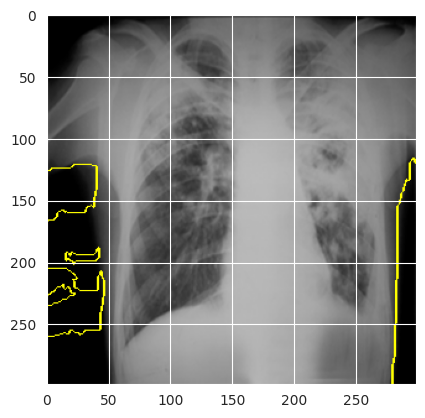

In [ ]:
from skimage.segmentation import mark_boundaries

# Load the image
fp = open("output.png","rb")
img = PIL.Image.open(fp)

# Preprocess the image for the model
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Get the explanation for the prediction
explanation = explainer.explain_instance(img_array, model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Create a visualization of the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp / 2 + 0.5, mask)

plt.imshow(img_boundry1)
plt.show()

In [ ]:
from PIL import Image

# Open the input image
input_image = Image.open('/content/Normal-2802.png')

# Resize the image to 256x256
output_image = input_image.resize((299, 299))

# Save the output image
output_image.save('output_image2.png')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


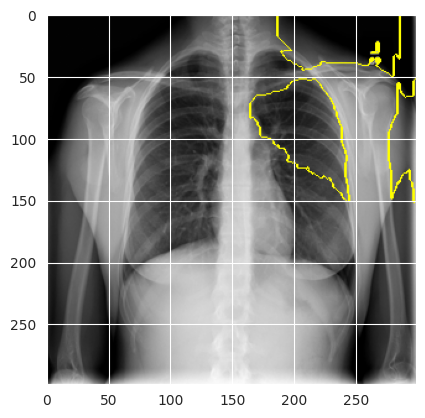

In [ ]:
from skimage.segmentation import mark_boundaries

# Load the image
fp = open("output_image2.png","rb")
img = PIL.Image.open(fp)

# Preprocess the image for the model
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Get the explanation for the prediction
explanation = explainer.explain_instance(img_array, model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Create a visualization of the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp / 2 + 0.5, mask)

plt.imshow(img_boundry1)
plt.show()

In [26]:
from lime import lime_image
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('vgg16_model.h5')

# Create the explainer object
explainer = lime_image.LimeImageExplainer()

In [ ]:
from PIL import Image

# Open the input image
input_image = Image.open('/content/Normal-2802.png')

# Resize the image to 256x256
output_image = input_image.resize((224, 224))

# Save the output image
output_image.save('output_image3.png')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


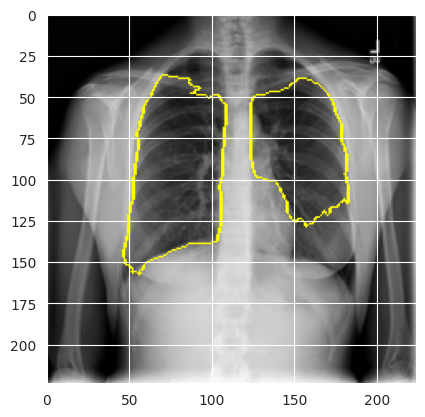

In [ ]:
from skimage.segmentation import mark_boundaries

# Load the image
fp = open("output_image3.png","rb")
img = PIL.Image.open(fp)

# Preprocess the image for the model
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Get the explanation for the prediction
explanation = explainer.explain_instance(img_array, model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Create a visualization of the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp / 2 + 0.5, mask)

plt.imshow(img_boundry1)
plt.show()

In [ ]:

from PIL import Image

# Open the input image
input_image = Image.open('/content/Tuberculosis-561.png')

# Resize the image to 256x256
output_image = input_image.resize((224, 224))

# Save the output image
output_image.save('output_image4.png')


In [ ]:
import numpy as np
from PIL import Image

# Load the grayscale image as a NumPy array
img_gray = np.array(Image.open("/content/output_image4.png").convert("L"))

# Convert the grayscale image to RGB
img_rgb = np.repeat(img_gray[..., np.newaxis], 3, axis=-1)

# Save the RGB image as a PNG file
Image.fromarray(img_rgb).save("/content/output1.png")


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


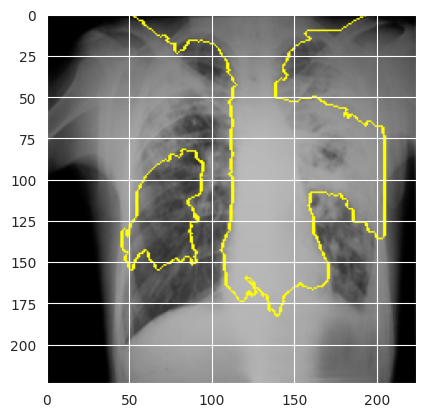

In [ ]:
from skimage.segmentation import mark_boundaries
import PIL
# Load the image
fp = open("output1.png","rb")
img = PIL.Image.open(fp)

# Preprocess the image for the model
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Get the explanation for the prediction
explanation = explainer.explain_instance(img_array, model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Create a visualization of the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp / 2 + 0.5, mask)

plt.imshow(img_boundry1)
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


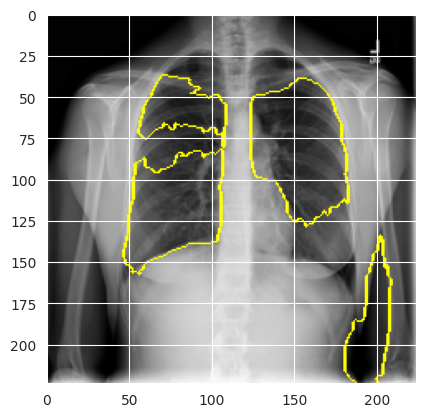

In [ ]:
from lime import lime_image
import tensorflow as tf

# Load the trained model
model3 = tf.keras.models.load_model('mobilenetv2_model.h5')

# Create the explainer object
explainer = lime_image.LimeImageExplainer()
from PIL import Image

# Open the input image
input_image = Image.open('/content/Normal-2802.png')

# Resize the image to 256x256
output_image = input_image.resize((224, 224))

# Save the output image
output_image.save('output_image3.png')
from skimage.segmentation import mark_boundaries

# Load the image
fp = open("output_image3.png","rb")
img = PIL.Image.open(fp)

# Preprocess the image for the model
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Get the explanation for the prediction
explanation = explainer.explain_instance(img_array, model3.predict, top_labels=5, hide_color=0, num_samples=1000)

# Create a visualization of the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp / 2 + 0.5, mask)

plt.imshow(img_boundry1)
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


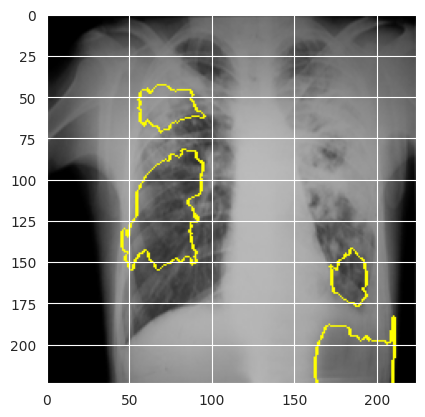

In [ ]:
from skimage.segmentation import mark_boundaries
import PIL
# Load the image
fp = open("output1.png","rb")
img = PIL.Image.open(fp)

# Preprocess the image for the model
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Get the explanation for the prediction
explanation = explainer.explain_instance(img_array, model3.predict, top_labels=5, hide_color=0, num_samples=1000)

# Create a visualization of the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp / 2 + 0.5, mask)

plt.imshow(img_boundry1)
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


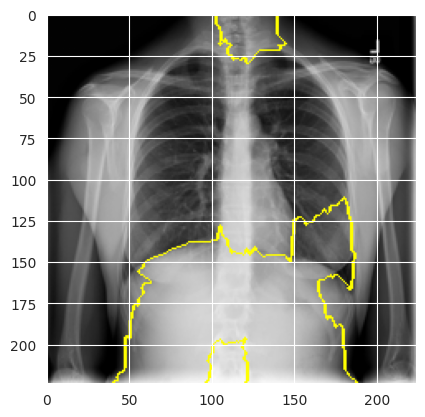

In [ ]:
from lime import lime_image
import tensorflow as tf

# Load the trained model
model3 = tf.keras.models.load_model('resnet50_model.h5')

# Create the explainer object
explainer = lime_image.LimeImageExplainer()
from PIL import Image

# Open the input image
input_image = Image.open('/content/Normal-2802.png')

# Resize the image to 256x256
output_image = input_image.resize((224, 224))

# Save the output image
output_image.save('output_image5.png')
from skimage.segmentation import mark_boundaries

# Load the image
fp = open("output_image5.png","rb")
img = PIL.Image.open(fp)

# Preprocess the image for the model
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Get the explanation for the prediction
explanation = explainer.explain_instance(img_array, model3.predict, top_labels=5, hide_color=0, num_samples=1000)

# Create a visualization of the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp / 2 + 0.5, mask)

plt.imshow(img_boundry1)
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


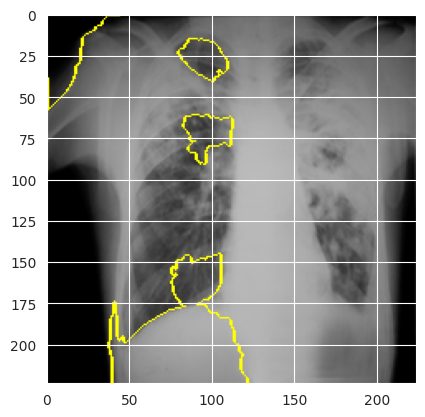

In [ ]:
from skimage.segmentation import mark_boundaries
import PIL
# Load the image
fp = open("output1.png","rb")
img = PIL.Image.open(fp)

# Preprocess the image for the model
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Get the explanation for the prediction
explanation = explainer.explain_instance(img_array, model3.predict, top_labels=5, hide_color=0, num_samples=1000)

# Create a visualization of the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp / 2 + 0.5, mask)

plt.imshow(img_boundry1)
plt.show()